## Loading Modules and Dataset

In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score

# load the dataset
df = pd.read_csv('C:/Users/User/IIT/banking.csv')
df.shape

(41188, 21)

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# Preprocessing Data

### Handling Missing Values

In [3]:
#Dropping 'default' column
df = df.drop('default', axis='columns')

#Dropping 'contact' column
df = df.drop('contact', axis='columns')

#Dropping 'pdays' column
df = df.drop('pdays', axis='columns')

#Removing 0 duration columns
i = df[(df.duration == 0)].index

for x in i:
    df = df.drop([x])

#Removing Job and Education missing rows
i = df[((df.job == 'unknown') & ( df.education == 'unknown'))].index

for x in i:
    df = df.drop([x])
    
#Removing Housing rows
i = df[(df.housing == 'unknown')].index

for x in i:
    df = df.drop([x])
    
#Removing Loan missing rows
i = df[(df.loan == 'unknown')].index

for x in i:
    df = df.drop([x])

### Handling Outliers

In [4]:
#Custom Method
def removal(x):
    if(x>upper):
        x=upper;
    elif(x<lower):
        x=lower;
    return x;

In [5]:
df2 = df

#Removing Age Outliers
upper = int(np.percentile(df['age'],[98]));
lower = int(np.percentile(df['age'],[1])[0]);
new_df = df['age'].apply(removal);
df2 = df2.drop('age', axis='columns')
df2['age'] = new_df


#Removing Duration Outliers
upper = int(np.percentile(df['duration'],[92]));
lower = int(np.percentile(df['duration'],[1])[0]);
new_df = df['duration'].apply(removal);
df2 = df2.drop('duration', axis='columns')
df2['duration'] = new_df

#Removing Campaign Outliers
upper = int(np.percentile(df['campaign'],[94]));
lower = int(np.percentile(df['campaign'],[1])[0]);
new_df = df['campaign'].apply(removal);
df2 = df2.drop('campaign', axis='columns')
df2['campaign'] = new_df

#Removing cons_conf_idx Outliers
upper = int(np.percentile(df['cons_conf_idx'],[98]));
lower = int(np.percentile(df['cons_conf_idx'],[1])[0]);
new_df = df['cons_conf_idx'].apply(removal);
df2 = df2.drop('cons_conf_idx', axis='columns')
df2['cons_conf_idx'] = new_df


<AxesSubplot:>

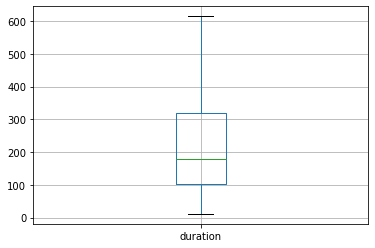

In [6]:
df2.boxplot('duration')

### Q-Q Plot and Transformations

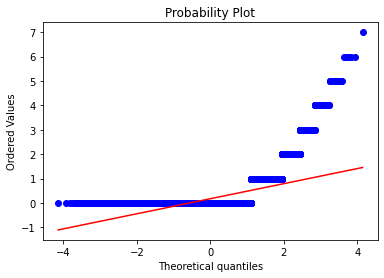

<AxesSubplot:>

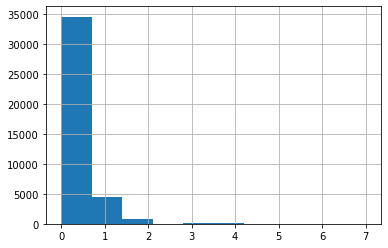

In [24]:
# stats.probplot(df2["duration"], dist="norm", plot=plt)
# plt.show()
# df2['duration'].hist()

# stats.probplot(df2["campaign"], dist="norm", plot=plt)
# plt.show()
# df2['campaign'].hist()

stats.probplot(df2["previous"], dist="norm", plot=plt)
plt.show()
df2['previous'].hist()

In [25]:
# colums to be transformed
columns = ['previous','campaign', 'duration', 'nr_employed']

# logarithm transformation object
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# transform data
data_new = logarithm_transformer.transform(df2[columns])
df_new = pd.DataFrame(data_new, columns=columns)
df_new.head(2)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:171: RuntimeWarning: divide by zero encountered in log
  return func(X, **(kw_args if kw_args else {}))


,previous,campaign,duration,nr_employed
0,-inf,0.0,5.347108,8.561803
1,-inf,0.0,4.927254,8.555606


### Feature Coding

In [70]:
data = df2
le = LabelEncoder()

#Label Job
label = le.fit_transform(df["job"])
data =data.drop("job", axis="columns")
data["job"] = label

#Label Marital
label = le.fit_transform(df["marital"])
data =data.drop("marital", axis="columns")
data["marital"] = label

#Label Education
label = le.fit_transform(df["education"])
data =data.drop("education", axis="columns")
data["education"] = label

#Label Housing
label = le.fit_transform(df["housing"])
data =data.drop("housing", axis="columns")
data["housing"] = label

#Label Loan
label = le.fit_transform(df["loan"])
data =data.drop("loan", axis="columns")
data["loan"] = label

#Label Poutcome
label = le.fit_transform(df["poutcome"])
data =data.drop("poutcome", axis="columns")
data["poutcome"] = label

#Label Month
label = le.fit_transform(df["month"])
data =data.drop("month", axis="columns")
data["month"] = label

#Label Poutcome
label = le.fit_transform(df["day_of_week"])
data =data.drop("day_of_week", axis="columns")
data["day_of_week"] = label

# data.head(15)



### Feature Scaling

In [69]:
#Create Scaler Object
scale = StandardScaler()

#Remove Target
temp_data = data.drop('y', axis='columns')

#Fit Dataframe to Scaler
scale.fit(temp_data)
data_2 = scale.transform(temp_data)

#Separate Target
y = pd.DataFrame(data['y'])

data_2 = pd.DataFrame(data_2)
# data_2

### Feature Discretization

In [81]:
# Create Discretizer Object
discretizer = KBinsDiscretizer(n_bins = 8, encode = 'ordinal', strategy = 'kmeans')

#Fit DataFrame Discretizer
discretizer.fit(data_2)
discretizer2 = discretizer.transform(data_2)
data_3 = pd.DataFrame(discretizer2)
data_3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,7.0,3.0,7.0,7.0,4.0,2.0,0.0,5.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
1,0.0,5.0,3.0,6.0,6.0,6.0,1.0,0.0,3.0,6.0,1.0,7.0,0.0,0.0,2.0,6.0,0.0
2,2.0,3.0,5.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,3.0,6.0,1.0,0.0,3.0,3.0,2.0
3,0.0,3.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,5.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0
4,1.0,2.0,0.0,1.0,3.0,6.0,1.0,0.0,7.0,3.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40064,0.0,7.0,7.0,7.0,7.0,7.0,3.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,2.0,3.0,2.0
40065,0.0,6.0,5.0,7.0,6.0,1.0,2.0,1.0,5.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
40066,0.0,6.0,5.0,7.0,6.0,3.0,0.0,2.0,5.0,0.0,3.0,6.0,1.0,1.0,2.0,5.0,4.0
40067,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1.0,7.0,6.0,1.0,5.0,0.0,1.0,2.0,7.0,3.0


## Feature Engineering

### Covariance Matrix

In [130]:
mean_vec = np.mean(x_pca, axis=0)
cov_mat = (data_3 - mean_vec).T.dot((data_3 - mean_vec)) / (data_3.shape[0]-1)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
          0          1          2          3          4          5   \
0   0.273909   0.503344   0.494085   0.296421   0.511805   0.515549   
1   0.503344  30.901218  22.688080  31.387541  31.656359  15.499201   
2   0.494085  22.688080  18.236673  22.783743  22.768294  11.458371   
3   0.296421  31.387541  22.783743  32.772087  32.332485  15.335904   
4   0.511805  31.656359  22.768294  32.332485  33.193521  16.301887   
5   0.515549  15.499201  11.458371  15.335904  16.301887  12.587901   
6   0.485799  13.084481   9.881626  12.768868  13.739218   7.585380   
7   0.155910   7.108116   5.252296   7.052985   7.398872   3.792877   
8   0.538834  17.547619  12.767046  17.850504  18.237197  10.168164   
9   0.419662  11.816712   8.661451  11.573325  12.384796   6.636643   
10  0.274508   7.414470   5.516771   7.197290   7.820031   3.473495   
11  0.686932  19.333308  14.075472  18.929944  20.346112  10.577893   
12  0.098033   2.740965   1.998153   2.676275   2.904762  

### Eigen Decomposition

In [135]:
#Performing Eigen Decomposition on Covariance Matrix
cov_mat = np.cov(data_3.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigen Values: \n%s' %eig_vals)
# print('Eigen Vectors: \n%s' %eig_vecs)

#Sort Eigen Values DESC
eig_pairs = [(np.abs(eig_vals[n]), eig_vecs[:,n]) for n in range(len(eig_vals))]
for n in eig_pairs:
    print(n[0])

14.920029179447738
6.952431701188486
4.995652248295034
4.490256675342922
4.777842335125471
3.905790571195615
2.8961704071026246
2.301393610813785
1.679211809711188
1.9168734765277724
0.7962100838540688
0.4327775451126145
0.24766507489459066
0.08051479470939275
0.10225931364185545
0.1396979397603155
0.13061578053852457


### Varaince Screeplot

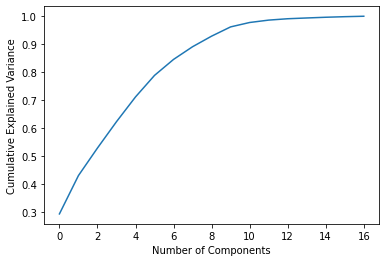

In [148]:
#Variance Plot
pca = PCA().fit(data_3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Principle Component Analysis

In [149]:
pca = PCA(n_components = 10)
pca.fit(data_3)
x_pca = pca.transform(data_3)
print('Attribute Variance: \n%s' %pca.explained_variance_ratio_)

x_pca.shape

Attribute Variance 
[0.29390158 0.13695219 0.09840665 0.09411613 0.08845114 0.07693806
 0.05705009 0.04533391 0.03775945 0.03307788]


(40069, 10)

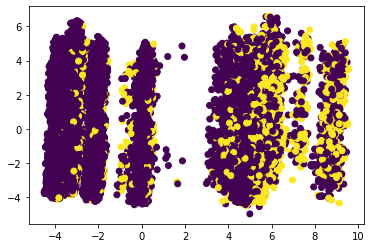

In [123]:
x_pca.shape
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['y'])

## Training Model

### Split Dataset

In [124]:
x = x_pca
y = data['y']
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Support Vector Machine

In [125]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [111]:
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc = 'Accuracy: ' + str(accuracy_score(y_test, y_pred))

print(acc)

[[7010  132]
 [ 661  211]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7142
           1       0.62      0.24      0.35       872

    accuracy                           0.90      8014
   macro avg       0.76      0.61      0.65      8014
weighted avg       0.88      0.90      0.88      8014

Accuracy: 0.9010481657100075


### Logistic Regression

In [126]:
lrclassifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lrclassifier.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [127]:
y_pred = lrclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
acc = 'Accuracy: ' + str(accuracy_score(y_test, y_pred))

print(acc)

[[6940  168]
 [ 564  342]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7108
           1       0.67      0.38      0.48       906

    accuracy                           0.91      8014
   macro avg       0.80      0.68      0.72      8014
weighted avg       0.90      0.91      0.90      8014

Accuracy: 0.9086598452707761
